In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (1).csv


In [ ]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [ ]:
df.shape

(5110, 12)

<Axes: xlabel='gender', ylabel='count'>

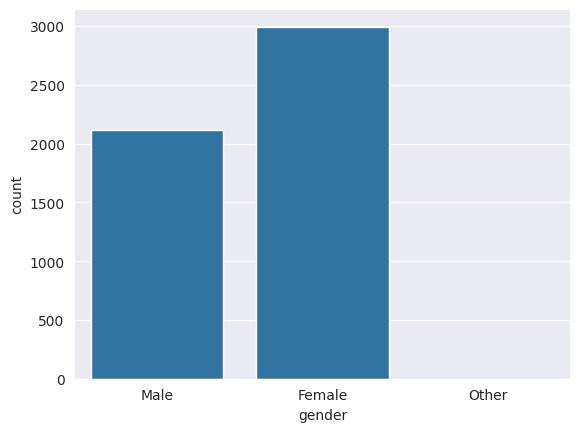

In [ ]:
sns.countplot(x = 'gender', data = df)

In [ ]:
df['gender'].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


In [ ]:
df['heart_disease'].value_counts()

,count
heart_disease,
0,4834
1,276


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<Axes: xlabel='heart_disease', ylabel='count'>

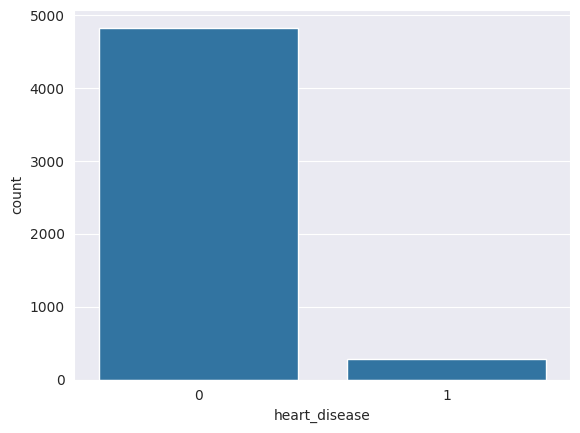

In [ ]:
sns.countplot(x = 'heart_disease', data = df)

In [ ]:
df.drop(['work_type','Residence_type','id','ever_married'], axis=1, inplace=True)

In [ ]:
df.shape

(5110, 8)

In [ ]:
df.head(2)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,202.21,NaN,never smoked,1


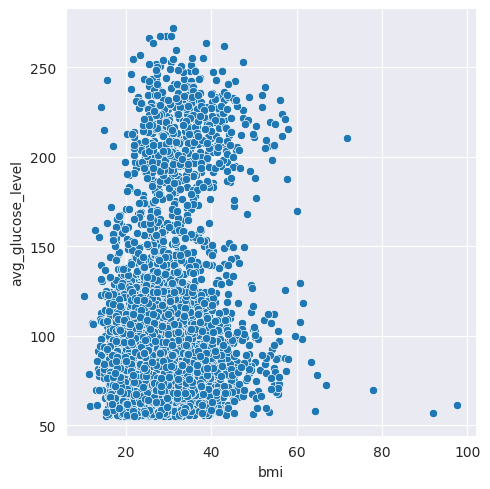

In [ ]:
sns.relplot(x='bmi', y='avg_glucose_level', data=df)

In [ ]:
df['bmi'].isnull().value_counts()

,count
bmi,
False,4909
True,201


In [ ]:
df['bmi'].var()

61.68636419426877

In [ ]:
mean_bmi=df['bmi'].mean()
df['bmi_mean']=df['bmi'].fillna(mean_bmi)
median_bmi=df['bmi'].median()
df['bmi_median']=df['bmi'].fillna(median_bmi)

In [ ]:
df

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,bmi_mean,bmi_median
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1,36.600000,36.6
1,Female,61.0,0,0,202.21,NaN,never smoked,1,28.893237,28.1
2,Male,80.0,0,1,105.92,32.5,never smoked,1,32.500000,32.5
3,Female,49.0,0,0,171.23,34.4,smokes,1,34.400000,34.4
4,Female,79.0,1,0,174.12,24.0,never smoked,1,24.000000,24.0
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,83.75,NaN,never smoked,0,28.893237,28.1
5106,Female,81.0,0,0,125.20,40.0,never smoked,0,40.000000,40.0
5107,Female,35.0,0,0,82.99,30.6,never smoked,0,30.600000,30.6
5108,Male,51.0,0,0,166.29,25.6,formerly smoked,0,25.600000,25.6


In [ ]:
df['bmi_mean'].var()

59.25947846260935

In [ ]:
df['bmi_median'].var()

59.28325990089285

<Axes: ylabel='Density'>

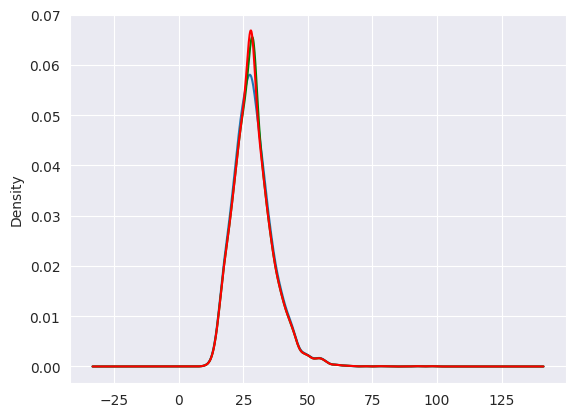

In [ ]:
df['bmi'].plot(kind='kde')
df['bmi_mean'].plot(kind='kde', color='green')
df['bmi_median'].plot(kind='kde', color='red')

<Axes: >

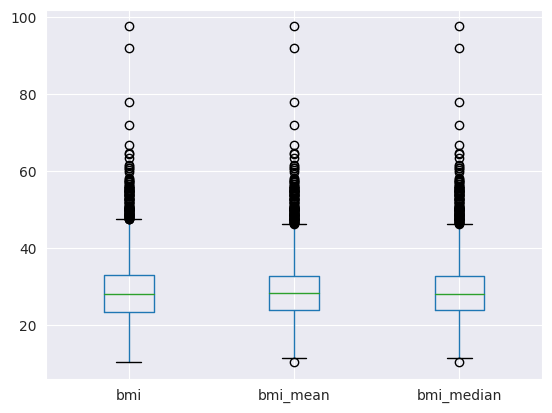

In [ ]:
df[['bmi','bmi_mean','bmi_median']].boxplot()

In [ ]:
df['bmi']=df['bmi_mean']

In [ ]:
df

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,bmi_mean,bmi_median
0,Male,67.0,0,1,228.69,36.600000,formerly smoked,1,36.600000,36.6
1,Female,61.0,0,0,202.21,28.893237,never smoked,1,28.893237,28.1
2,Male,80.0,0,1,105.92,32.500000,never smoked,1,32.500000,32.5
3,Female,49.0,0,0,171.23,34.400000,smokes,1,34.400000,34.4
4,Female,79.0,1,0,174.12,24.000000,never smoked,1,24.000000,24.0
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,83.75,28.893237,never smoked,0,28.893237,28.1
5106,Female,81.0,0,0,125.20,40.000000,never smoked,0,40.000000,40.0
5107,Female,35.0,0,0,82.99,30.600000,never smoked,0,30.600000,30.6
5108,Male,51.0,0,0,166.29,25.600000,formerly smoked,0,25.600000,25.6


In [ ]:
df.drop(['bmi_mean','bmi_median'], axis=1,inplace=True)

In [ ]:
df.head(2)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,202.21,28.893237,never smoked,1


In [ ]:
df['smoking_status'].value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


In [ ]:
df[df['gender']=='Other']

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,143.33,22.4,formerly smoked,0


In [ ]:
df.drop([3116], axis=0, inplace=True)

In [ ]:
df['gender'].value_counts()

,count
gender,
Female,2994
Male,2115


In [ ]:
df.shape

(5109, 8)

<Axes: xlabel='stroke', ylabel='count'>

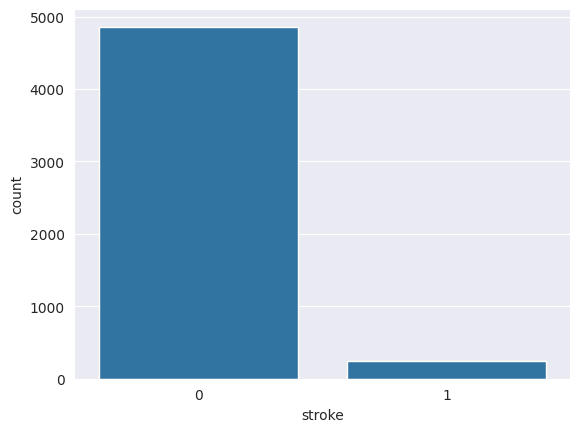

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x = 'stroke', data = df)

In [ ]:
df['stroke'].value_counts()

,count
stroke,
0,4860
1,249


In [ ]:
df=pd.get_dummies(df,columns=['gender','smoking_status'], drop_first=True)

In [ ]:
df.head(3)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,True,True,False,False
1,61.0,0,0,202.21,28.893237,1,False,False,True,False
2,80.0,0,1,105.92,32.500000,1,True,False,True,False


In [ ]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.276367,0.263777,0.238323,0.325858,0.245239,-0.027752,0.237347,0.119207,0.073075
hypertension,0.276367,1.000000,0.108292,0.174540,0.160147,0.127891,0.021223,0.059022,0.065018,0.031213
heart_disease,0.263777,0.108292,1.000000,0.161907,0.038862,0.134905,0.085685,0.066938,-0.021893,0.044030
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.168910,0.131991,0.054722,0.067796,0.024011,0.017716
bmi,0.325858,0.160147,0.038862,0.168910,1.000000,0.038912,-0.025606,0.104674,0.106107,0.085516
stroke,0.245239,0.127891,0.134905,0.131991,0.038912,1.000000,0.009081,0.064683,-0.004163,0.008920
gender_Male,-0.027752,0.021223,0.085685,0.054722,-0.025606,0.009081,1.000000,0.043121,-0.098952,0.011408
smoking_status_formerly smoked,0.237347,0.059022,0.066938,0.067796,0.104674,0.064683,0.043121,1.000000,-0.350790,-0.195483
smoking_status_never smoked,0.119207,0.065018,-0.021893,0.024011,0.106107,-0.004163,-0.098952,-0.350790,1.000000,-0.327742
smoking_status_smokes,0.073075,0.031213,0.044030,0.017716,0.085516,0.008920,0.011408,-0.195483,-0.327742,1.000000


<Axes: >

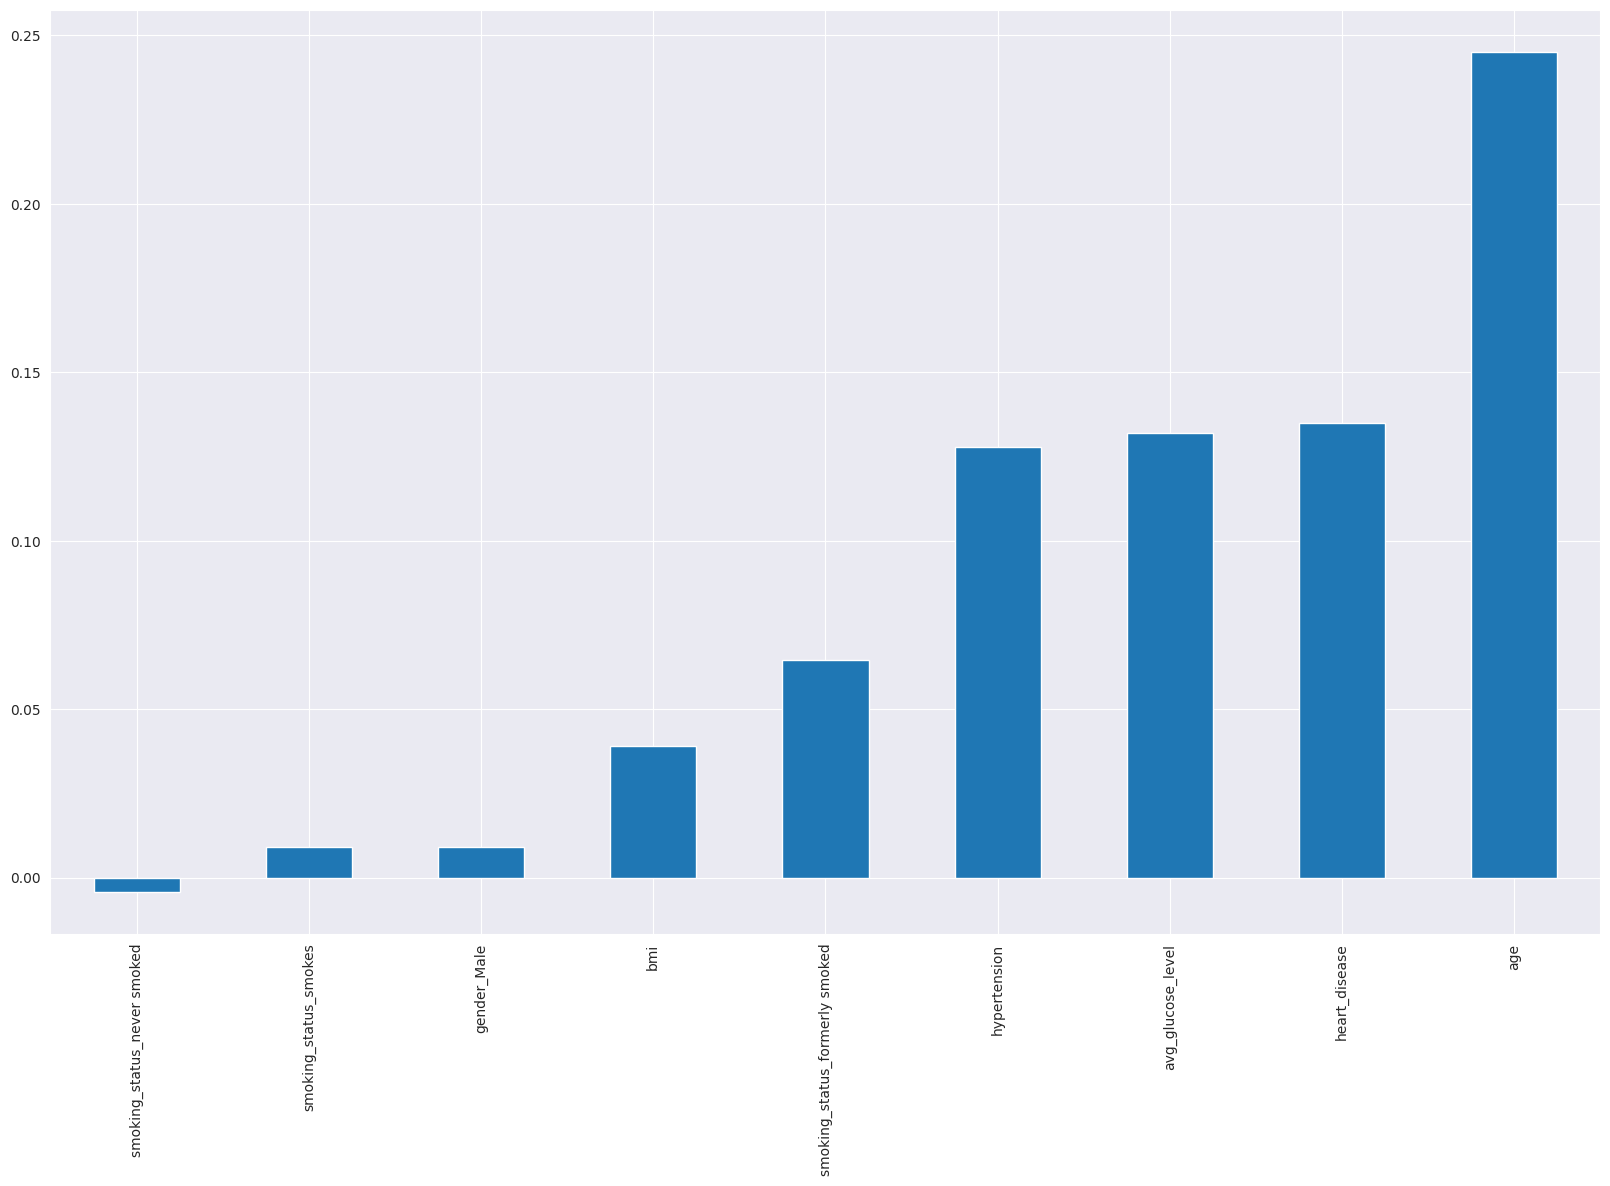

In [ ]:
plt.figure(figsize=(20, 12))
df.corr()['stroke'].sort_values()[:-1].plot(kind = 'bar')

In [ ]:
df.shape

(5109, 10)

In [ ]:
X = df.drop('stroke', axis = 1).values
y = df['stroke'].values
X.shape

(5109, 9)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
X_train.shape

(3423, 9)

In [ ]:
X_test.shape

(1686, 9)

In [ ]:
y_train.shape

(3423,)

In [ ]:
y_test.shape

(1686,)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-1.22147754, -0.32882458, -0.23834357, ...,  2.20256261,
        -0.7484411 , -0.4394299 ],
       [ 1.6007499 ,  3.04113515, -0.23834357, ...,  2.20256261,
        -0.7484411 , -0.4394299 ],
       [-1.08918562, -0.32882458, -0.23834357, ..., -0.45401661,
         1.33611048, -0.4394299 ],
       ...,
       [ 1.6007499 , -0.32882458,  4.19562401, ...,  2.20256261,
        -0.7484411 , -0.4394299 ],
       [-1.04508832, -0.32882458, -0.23834357, ..., -0.45401661,
         1.33611048, -0.4394299 ],
       [ 0.58651192, -0.32882458, -0.23834357, ..., -0.45401661,
        -0.7484411 , -0.4394299 ]])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(32, activation='relu', input_dim=9))  # Increased neurons
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 32)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 353 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(X_train_scaled, y_train, epochs = 500)

Epoch 1/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5829
Epoch 2/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2625
Epoch 3/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1937
Epoch 4/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1733
Epoch 5/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1583
Epoch 6/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1807
Epoch 7/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1733
Epoch 8/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1490
Epoch 9/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1464
Epoch 10/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1552
Epoch 11/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1605
Epoch 12/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1460
Epoch 13/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1496
Epoch 14/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1425
Epoch 15/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
model.layers[0].get_weights()

[array([[ 0.45391116, -0.08408818, -0.6119555 ,  0.58952546,  0.37739205,
         -0.01592285,  0.7804666 ,  0.4243706 , -0.16350989, -0.38693437,
         -0.05746423, -0.23494318, -0.11331607,  0.42802843,  0.74283934,
          0.31519175, -1.0056446 , -0.01938276, -0.07990075, -0.91534185,
          0.0031783 ,  0.22686847,  0.03813466,  0.6802074 ,  0.35754177,
          0.5890532 ,  0.49066514,  0.7680472 , -0.7981763 , -1.1336236 ,
         -0.38945663, -0.50345814],
        [-0.23430438, -0.6190976 , -0.7072004 , -0.42962646, -0.70175844,
         -0.30230924, -0.53901047,  0.40199384,  0.3552974 ,  0.24502926,
         -0.0999073 ,  0.24928235, -0.30949935, -0.7756864 , -0.14754817,
          0.45006967, -0.73215723, -0.15701887,  0.3792079 , -0.2424242 ,
         -0.24843168, -0.4385398 ,  0.4077141 , -0.14052437, -0.09830827,
         -0.0826226 ,  0.61231506, -0.12008842,  0.7359179 ,  0.4139462 ,
          0.0850019 , -0.21104388],
        [-0.04690075, -0.5469491 , -0.16

In [ ]:
model.predict(X_test_scaled)

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.3471278e-07],
       [3.8256235e-02],
       [2.3616788e-03],
       ...,
       [1.2405603e-02],
       [2.4803445e-08],
       [1.0298114e-02]], dtype=float32)

In [ ]:
y_log = model.predict(X_test_scaled)

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
y_pred = np.where(y_log > 0.2,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.900355871886121

In [ ]:
pd.DataFrame(model.history.history)


""


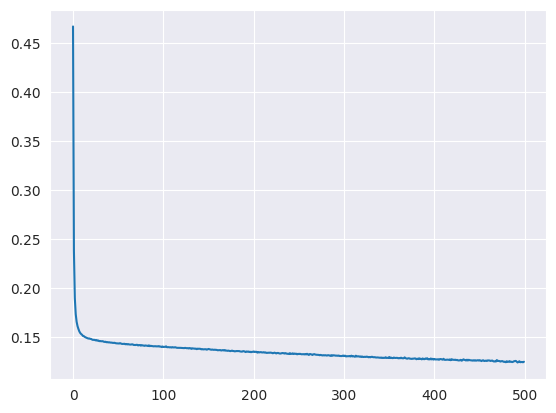

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
input_data = np.array([[80, 1, 1, 228, 34, 1, 1, 0, 0]])  # Now only 9 values
prediction = model.predict(input_data)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[1.]]


In [ ]:

# Set the threshold value
threshold = 1

# Get the prediction probability (assuming it's a single output)
predicted_probability = prediction[0][0]

# Apply the threshold to make a classification decision
predicted_class = 1 if predicted_probability >= threshold else 0

print(f"Predicted Probability: {predicted_probability}")
print(f"Predicted Class: {predicted_class}")


Predicted Probability: 1.0
Predicted Class: 1


In [ ]:
input_data = np.array([[27,0,0,18,18,0,0,1,0]])  # Now only 9 values
prediction = model.predict(input_data)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.99999654]]


In [ ]:

# Set the threshold value
threshold = 1
# Get the prediction probability (assuming it's a single output)
predicted_probability = prediction[0][0]

# Apply the threshold to make a classification decision
predicted_class = 1 if predicted_probability >= threshold else 0

print(f"Predicted Probability: {predicted_probability}")
print(f"Predicted Class: {predicted_class}")


Predicted Probability: 0.999996542930603
Predicted Class: 0


In [ ]:
import numpy as np

# Define the function to get user input and make a prediction
def make_prediction():
    print("Please enter the following values:")

    # Collect input from the user
    age = int(input("Age: "))
    hypertension = int(input("Hypertension (0 or 1): "))
    heart_disease = int(input("Heart Disease (0 or 1): "))
    avg_glucose_level = float(input("Average Glucose Level: "))
    bmi = float(input("BMI: "))
    gender = int(input("Gender (0 for female, 1 for male): "))
    smoking_status = int(input("Smoking Status (0 for never smoked, 1 for formerly smoked, 2 for smokes): "))
    feature_8 = int(input("Feature 8 (0 or 1): "))
    feature_9 = int(input("Feature 9 (0 or 1): "))

    # Create the input array
    input_data = np.array([[age, hypertension, heart_disease, avg_glucose_level, bmi, gender, smoking_status, feature_8, feature_9]])

    # Make the prediction
    prediction = model.predict(input_data)

    # Print the prediction
    print(f"Predicted Probability: {prediction[0][0]}")
    predicted_class = 1 if prediction[0][0] >= 1 else 0  # Using 0.5 as the threshold
    print(f"Predicted Class: {predicted_class}")

# Call the function to execute
make_prediction()


Please enter the following values:
Age: 27
Hypertension (0 or 1): 0
Heart Disease (0 or 1): 0
Average Glucose Level: 18
BMI: 18
Gender (0 for female, 1 for male): 0
Smoking Status (0 for never smoked, 1 for formerly smoked, 2 for smokes): 0
Feature 8 (0 or 1): 1
Feature 9 (0 or 1): 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Probability: 0.999996542930603
Predicted Class: 0


In [ ]:
make_prediction()

Please enter the following values:
Age: 80
Hypertension (0 or 1): 1
Heart Disease (0 or 1): 1
Average Glucose Level: 228
BMI: 34
Gender (0 for female, 1 for male): 1
Smoking Status (0 for never smoked, 1 for formerly smoked, 2 for smokes): 1
Feature 8 (0 or 1): 0
Feature 9 (0 or 1): 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Probability: 1.0
Predicted Class: 1
